# Data aging simulation
Having a limited memory, can we represent data aging ? which is another dimension all-together.

## Inspiration
When we have different "things" we refer to these things "aging" as the following:
- Each "thing" is still identifiable (unique, different to all others)
- The "thing" is aging when it could be represented with less entropy

This is a simplistic example (someone could do the subsequent math) that illustrates "things aging". Each thing is 

- number of things: length
- each thing dimension is: (length by length by {1, 0}) with {0,1} represent uniqueness and {2} represents undefined
- to make it easy, I implemented the aging cells affecting half the space, in order to keep the other half intact and thus the whole unique

In [90]:
def equals(data, data2):
    for idx, row in enumerate(data):
#         todo: equals must compare just the second half
        for idy, num in enumerate(row):
            if(data[idx][idy] != data2[idx][idy]):
                return False
    return True
# data = [
#     [0,0,0,0,0,1,1,1,1,0],
#     [0,0,0,0,0,1,0,0,1,0],
#     [0,0,1,0,1,0,1,1,0,0],
#     [0,0,1,0,0,1,1,0,1,0],
#     [0,0,1,0,1,0,0,1,1,0],
#     [1,0,0,1,0,1,0,0,1,0],
#     [0,1,0,0,0,1,1,1,1,1],
#     [0,1,0,0,0,0,1,1,1,1],
#     [1,0,0,0,1,1,1,0,1,0],
#     [1,1,1,1,0,0,0,1,1,0]
# ]

# data2 = [
#     [0,0,0,0,0,1,1,1,1,0],
#     [0,0,0,0,0,1,0,0,1,0],
#     [0,0,1,0,1,0,1,1,0,0],
#     [0,0,1,0,0,1,1,0,1,0],
#     [0,0,1,0,1,0,0,1,1,0],
#     [1,0,0,1,0,1,0,0,1,0],
#     [0,1,0,0,0,1,1,1,1,1],
#     [0,1,0,0,0,0,1,1,1,1],
#     [1,0,0,0,1,1,1,0,1,0],
#     [1,1,1,1,0,0,0,1,1,0]
# ]

# equals(data, data2)

In [91]:
from pylab import rcParams
rcParams['figure.figsize'] = 50, 10


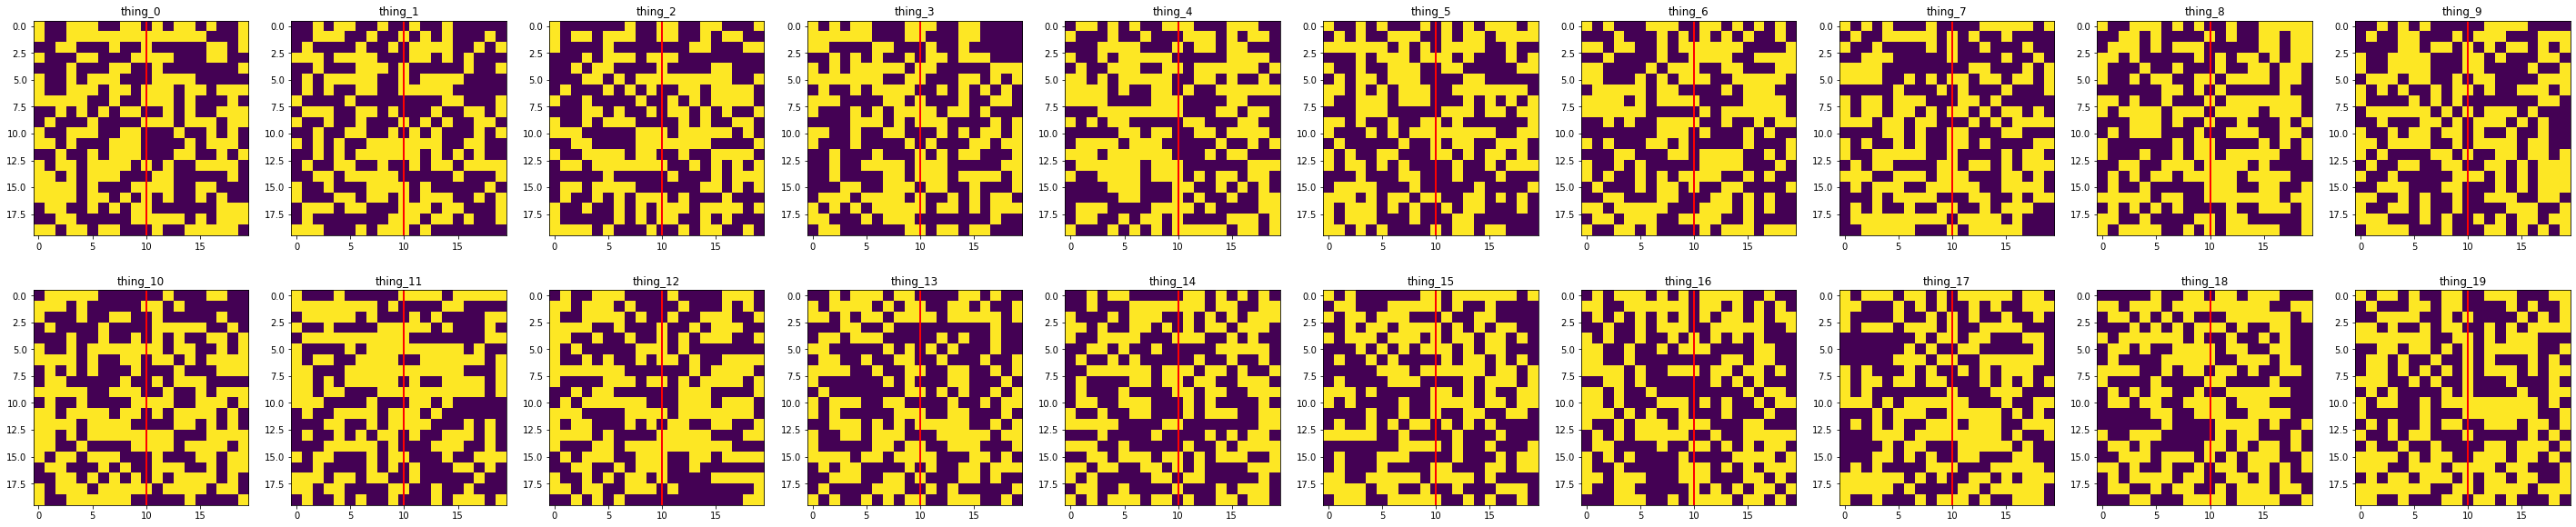

In [98]:
from random import seed
from random import random
seed(1)
length=20
def generator(datas, length):
    data = []
    for i in range(length):
        row = []
        for j in range(length):
            row.append(int(random()<0.5))
        data.append(row)
    for earlier in datas:
        if equals(earlier, data):
            return generator(datas, length)
    datas.append(data)
    return data

datas = []
import matplotlib.pyplot as plt
f, axarr = plt.subplots(2, length // 2)
for i in range(length):
    data = generator(datas, length)
    datas.append(data)
    axis = axarr[(i//(length // 2)), i%(length // 2)]
    axis.set_title('thing_'+str(i))
    axis.imshow(data)
    axis.axvline(length // 2 , color ='red', lw = 2)
plt.show()


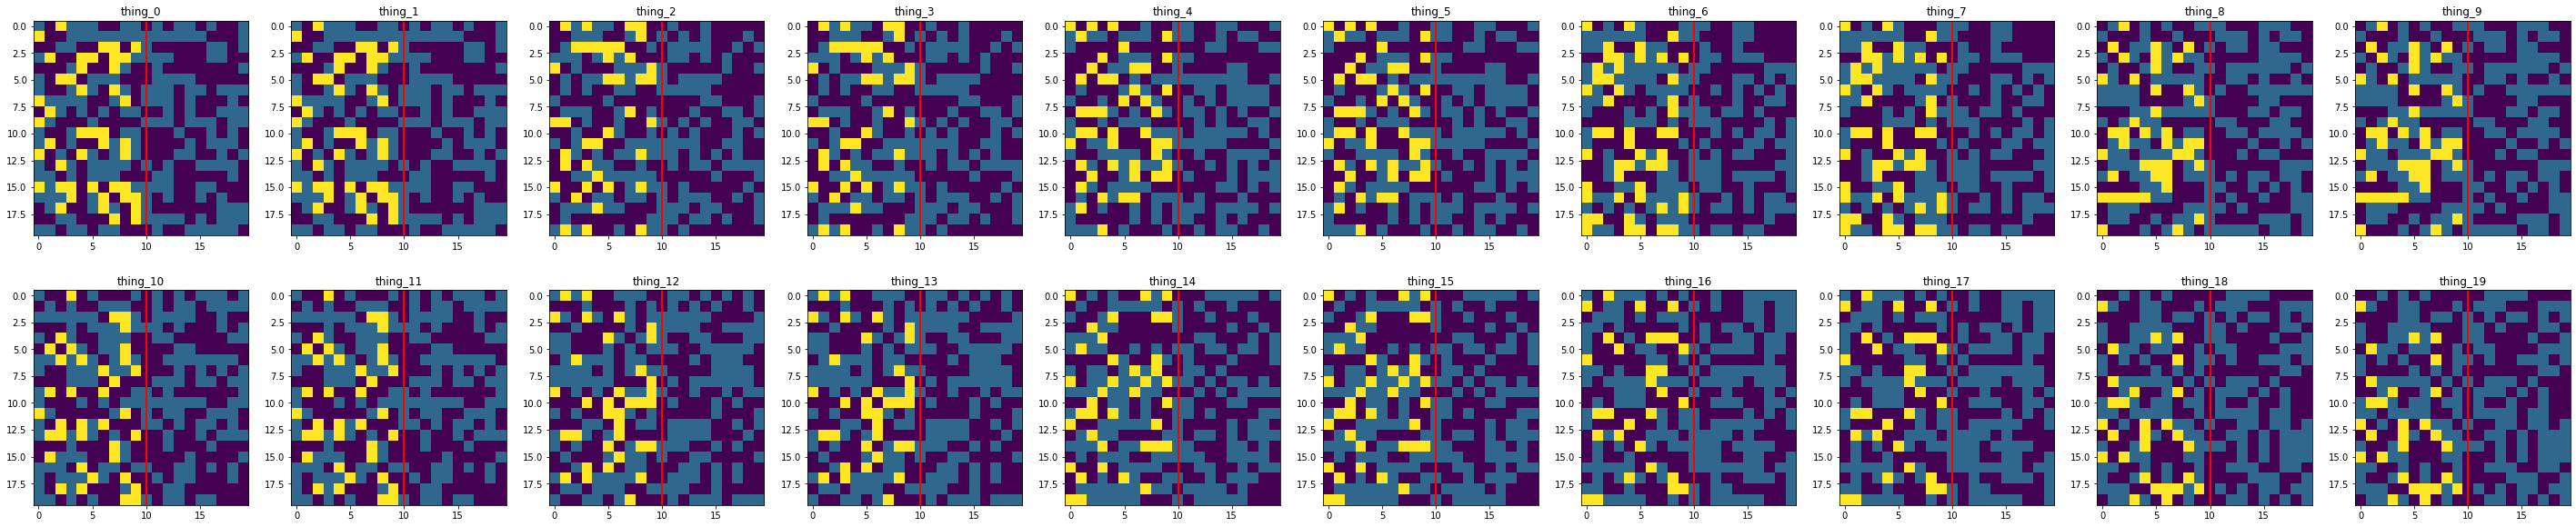

In [99]:
# aging
speed = 0.1
for data in datas:
    for i in range(length):
        for j in range(length//2):
            if random()<speed:
                data[i][j] = 3
                
f, axarr = plt.subplots(2, length // 2)
for i in range(length):
    axis = axarr[(i//(length // 2)), i%(length // 2)]
    axis.set_title('thing_'+str(i))
    axis.imshow(datas[i])
    axis.axvline(length // 2, color ='red', lw = 2)
plt.show()
